# Task 1: K-Means Clustering

#Generate a synthetic dataset

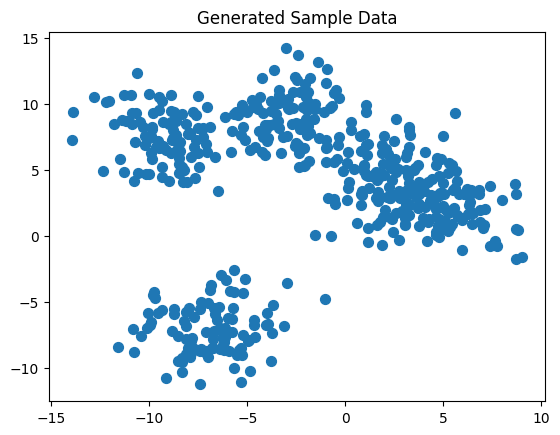

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from sklearn.cluster import KMeans  # Import KMeans algorithm from scikit-learn
from sklearn.datasets import make_blobs  # To generate synthetic data

# Step 1: Generate sample data
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=1.9, random_state= 42)

# Visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Sample Data")
plt.show()


#Apply K-Means Clustering

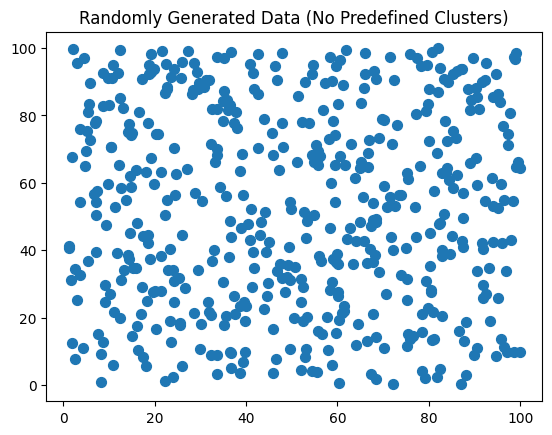

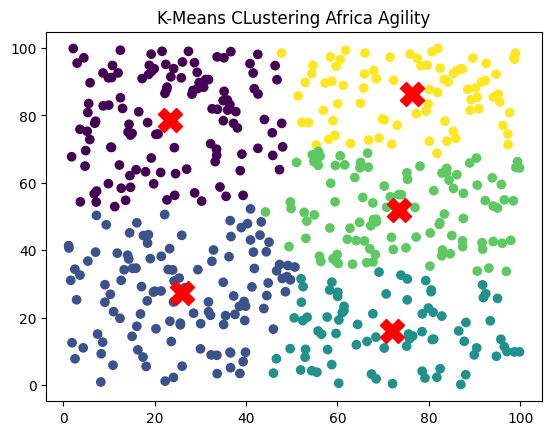

In [ ]:

# Generate random data (without predefined centers)
X = np.random.rand(500, 2) * 100 # 500 points in a 2D space (scaled between 0 and 10)


# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Randomly Generated Data (No Predefined Clusters)")
plt.show()

#k=5
#Apply Kmeans with n number of clusters
kmeans = KMeans(n_clusters=5, random_state=42, init='random', n_init=10)
kmeans.fit(X)

#Assign Clusters to visualization
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means CLustering Africa Agility")
plt.show()

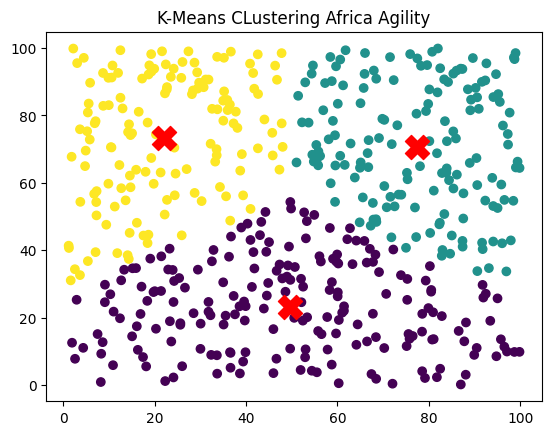

In [ ]:
k=3

#Apply Kmeans with n number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, init='random', n_init=10)
kmeans.fit(X)

#Assign Clusters to visualization
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means CLustering Africa Agility")
plt.show()

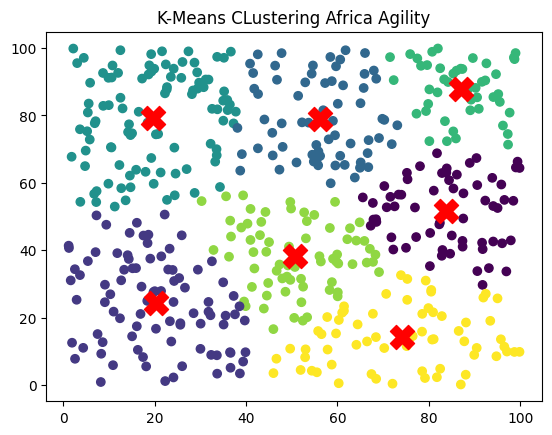

In [ ]:
#k=7

#Apply Kmeans with n number of clusters
kmeans = KMeans(n_clusters=7, random_state=42, init='random', n_init=10)
kmeans.fit(X)

#Assign Clusters to visualization
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means CLustering Africa Agility")
plt.show()

# Task 2: Dimensionality Reduction with PCA

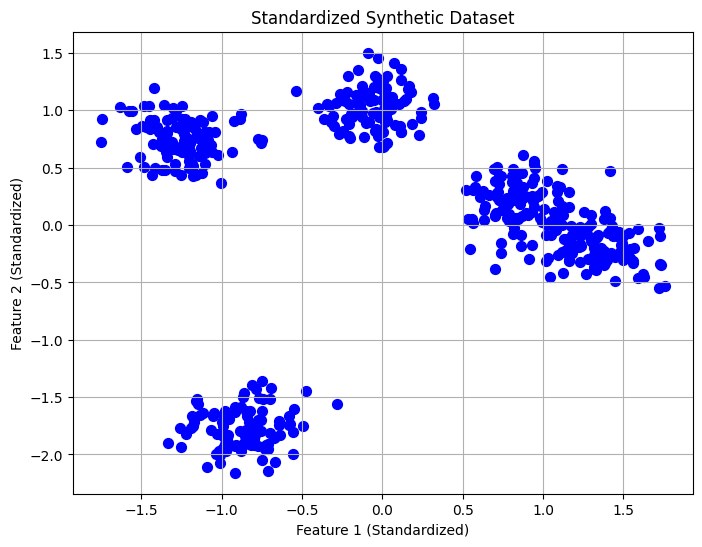

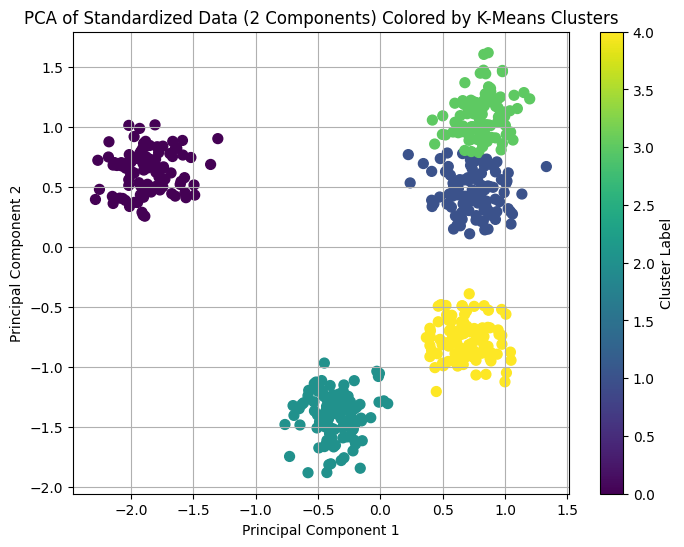

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Re-generate the synthetic dataset (to ensure we start fresh if needed)
n_samples = 500
n_clusters = 5
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=random_state)

# 1. Standardize the Dataset:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the standardized dataset (optional, but good practice)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', marker='o', s=50)
plt.title('Standardized Synthetic Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.show()

# 2. Apply PCA for Dimensionality Reduction:
n_components = 2

# Initialize PCA with 2 components
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data and transform it
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means on the original (scaled) data to get cluster labels for coloring
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Visualize the data in 2D using a scatter plot, colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, marker='o', s=50, cmap='viridis')
plt.title('PCA of Standardized Data (2 Components) Colored by K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# Print out the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio per Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Analyze how much of the total variance is captured by the first two principal components
total_explained_variance = sum(explained_variance_ratio)
print(f"\nTotal Variance Captured by the First {n_components} Principal Components: {total_explained_variance:.4f}")


Explained Variance Ratio per Principal Component:
Principal Component 1: 0.5446
Principal Component 2: 0.4554

Total Variance Captured by the First 2 Principal Components: 1.0000


# Choosing the Optimal K (Elbow Method)

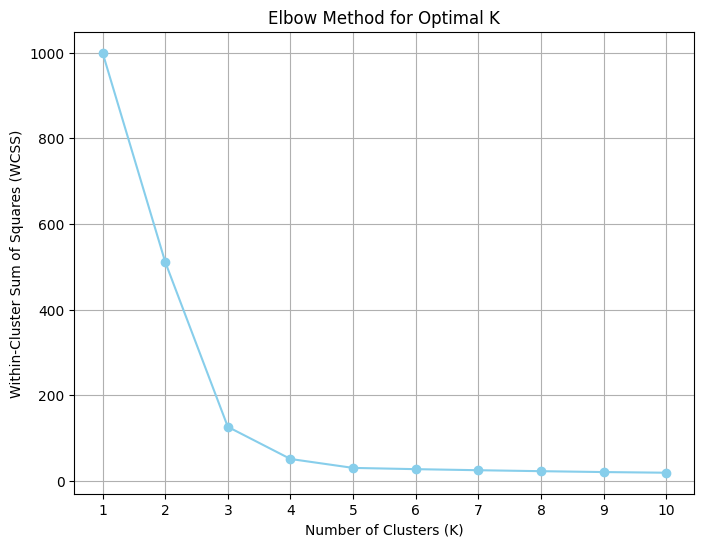


Analyzing the Elbow Curve:
The elbow method suggests looking for a point where the rate of decrease in WCSS starts to slow down significantly. This point is often considered a good estimate for K.
In the generated plot, observe where the line starts to flatten out. Ideally, this should correspond to the true number of clusters used to generate the data (which was 5 in this case).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Re-generate the synthetic dataset
n_samples = 500
n_clusters_true = 5  # True number of clusters for comparison
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=n_clusters_true, random_state=random_state)

# 1. Standardize the Dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the Elbow Method
wcss = []
possible_k_values = range(1, 11)  # Try K values from 1 to 10

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, wcss, marker='o', linestyle='-', color='skyblue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Analyze the Elbow Curve
print("\nAnalyzing the Elbow Curve:")
print("The elbow method suggests looking for a point where the rate of decrease in WCSS starts to slow down significantly. This point is often considered a good estimate for K.")
print("In the generated plot, observe where the line starts to flatten out. Ideally, this should correspond to the true number of clusters used to generate the data (which was 5 in this case).")